# **ANALYSIS DE GDP BY STATE**

## 1. Importación de Librerías

In [3]:
import pandas as pd  # Cargamos la libreria de "pandas" para la manipulación y el análisis de datos
import numpy as np
import seaborn as sns  # Cargarmos la libreria de "seaborn" para graficar la relacion que existen entre las variables
import matplotlib.pyplot as plt  # Cargarmos la libreria de "matplotlib" para graficar la relación que existen entre variables
import folium  # Cargamos la biblioteca folium para visualizaciones de mapas
import json
import warnings

warnings.filterwarnings("ignore")

## 2. Carga de Datos Auxiliares

Hemos conseguir obtener datos económicos de los 51 estados de EE. UU. desde la página BEA (U.S. Bureau of Economic Analysis) donde se encuentran muchos datos economicos. Esto es esencial para nuestro análisis socioeconómico.

In [4]:
# Establecemos la ruta del archivo Excel
archivo_excel = "../../01-data-cleaned/GDP by State.xlsx"

# Procedemos a cargar el archivo Excel en un DataFrame
df_gdp_state = pd.read_excel(archivo_excel)

In [5]:
# Visualizamos el DataFrame
df_gdp_state.head()

,State,Year,Agri_Fores_Fish_Hunt,Mining_Oil_Gas,Utilities,Construction,Manufacturing,WholesaleTrade,Retail_Trade,Trans_Warehousing,Information,Finance_Insurance,Proff_Busi_Services,Edu_Health_Social_Services,Arts_Recreation,Other_Services,Gover_Services,Total
0,Alabama,2019,2063.7,1777.2,6539.5,10605.6,37519.4,13748.3,16630.6,6559.8,5011.2,40099.8,23138.1,19217.0,7542.4,6028.8,38045.1,234526.5
1,Alaska,2019,461.5,6767.0,827.4,2764.6,1475.8,1542.2,2651.5,7447.8,1223.5,6803.0,3348.7,4709.9,2001.3,971.1,11474.6,54469.9
2,Arizona,2019,2344.9,4104.1,7668.8,19801.2,31568.3,20162.8,26962.4,12411.9,14272.7,86101.8,42844.9,36876.0,17065.0,7775.9,45584.3,375545.0
3,Arkansas,2019,1852.1,752.0,3504.2,5248.0,18734.9,10405.4,9725.2,5927.8,2332.3,21568.2,14376.1,12819.1,4729.1,3268.3,17394.4,132637.1
4,California,2019,37304.6,8217.0,40239.7,128774.9,335177.2,173197.2,172119.8,94022.4,305961.4,560534.9,424300.2,232068.5,140800.2,61809.5,347631.5,3062159.0


In [6]:
# Reemplazar "giorgia" por "georgia" en la columna 'State'
df_gdp_state["State"] = df_gdp_state["State"].replace("Giorgia", "Georgia", regex=True)

Este Dataframe presenta el valor contribuido por cada industria al Producto Interno Bruto (GDP) de cada estado, junto con el total de contribuciones al GDP de los Estados Unidos. Cada columna representa una industria específica, y cada fila representa un estado, con el último totalizando las contribuciones de todas las industrias al GDP nacional.

Explicaremos brevemente en que consiste cada etiqueta en el Dataframe:


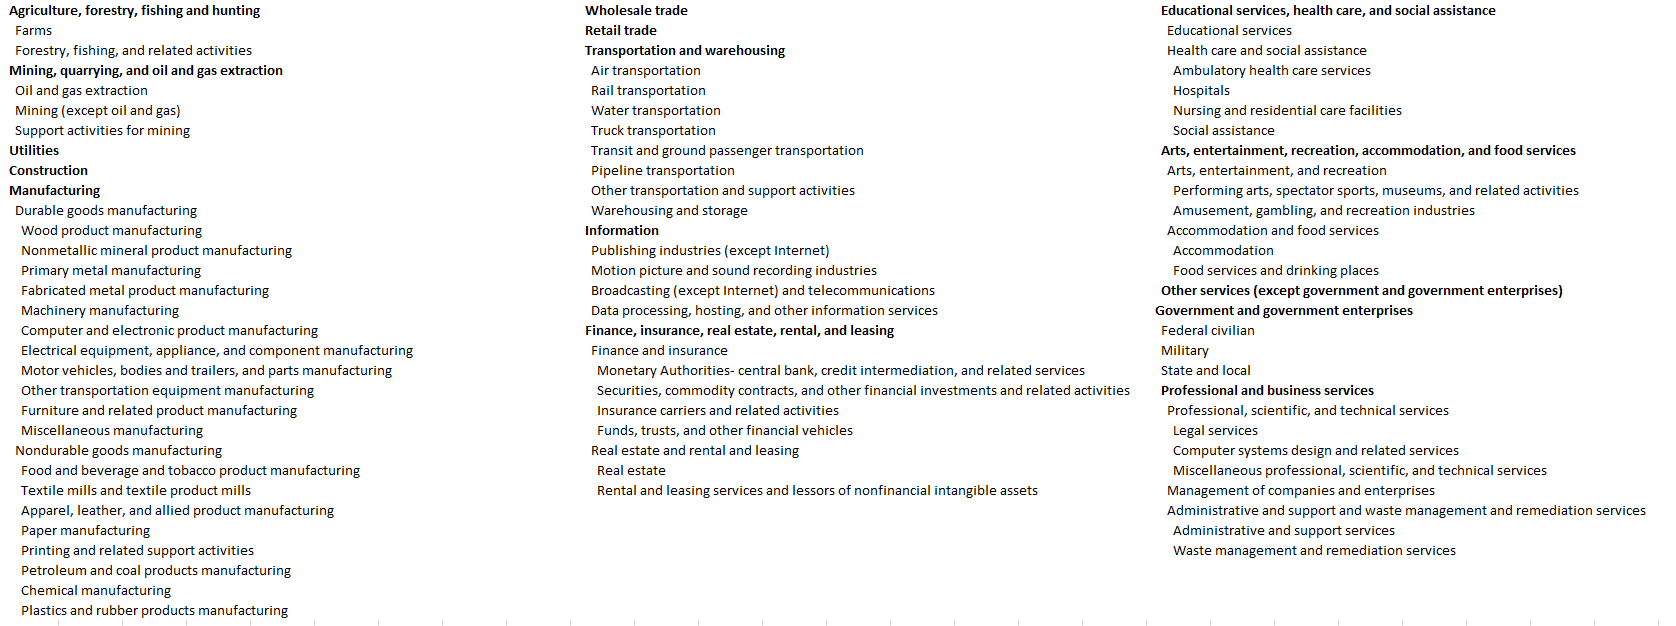

## 3. Aporte de cada Industria al GDP nacional by State

In [7]:
# Observamos la lista de estados que tenemos
states = df_gdp_state["State"].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
# Verificamos cuantos años de data tenemos
years = df_gdp_state["Year"].unique()
years

array([2019, 2020, 2021, 2022], dtype=int64)

In [9]:
# Eliminar la columna "Total" del DataFrame
df_gdp_state_wo_total = df_gdp_state.drop(columns=["Total"])

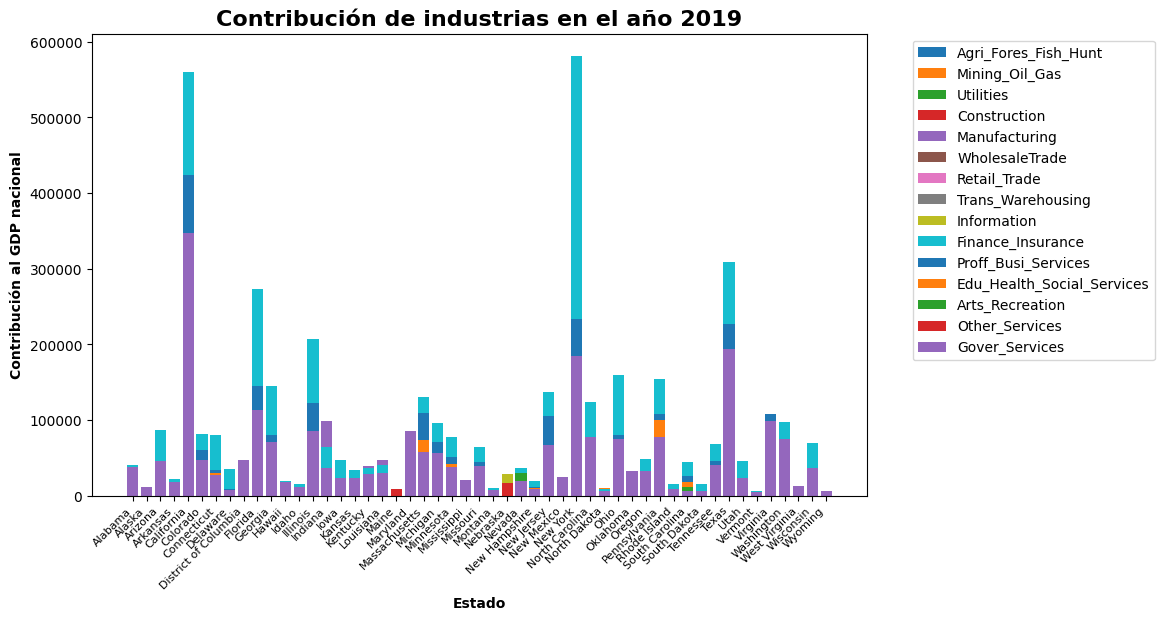

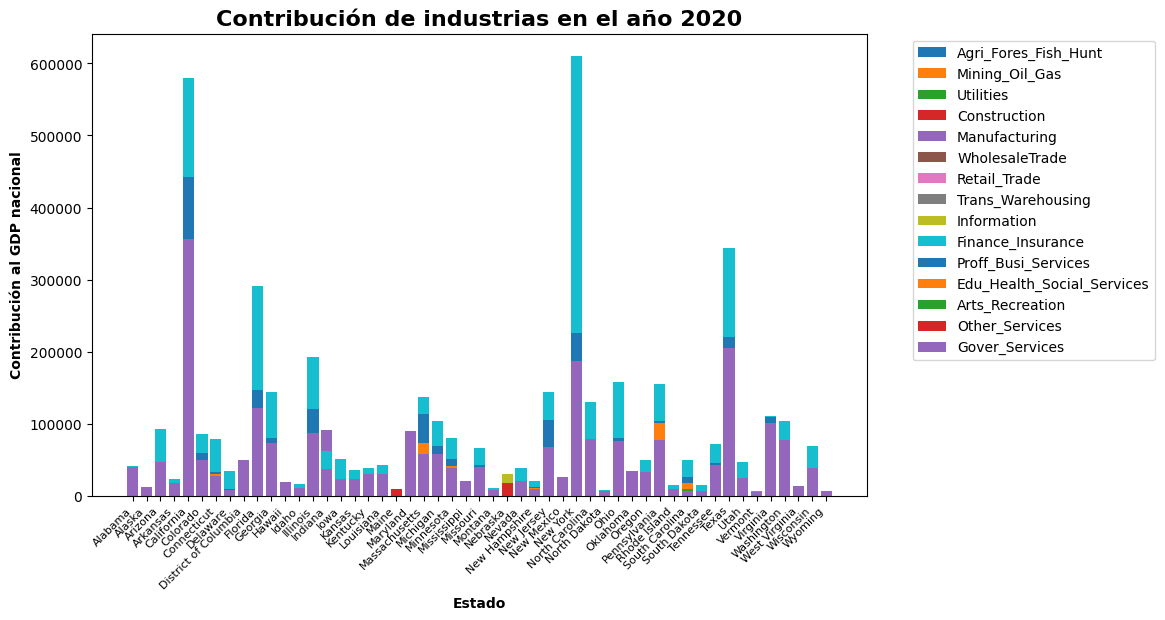

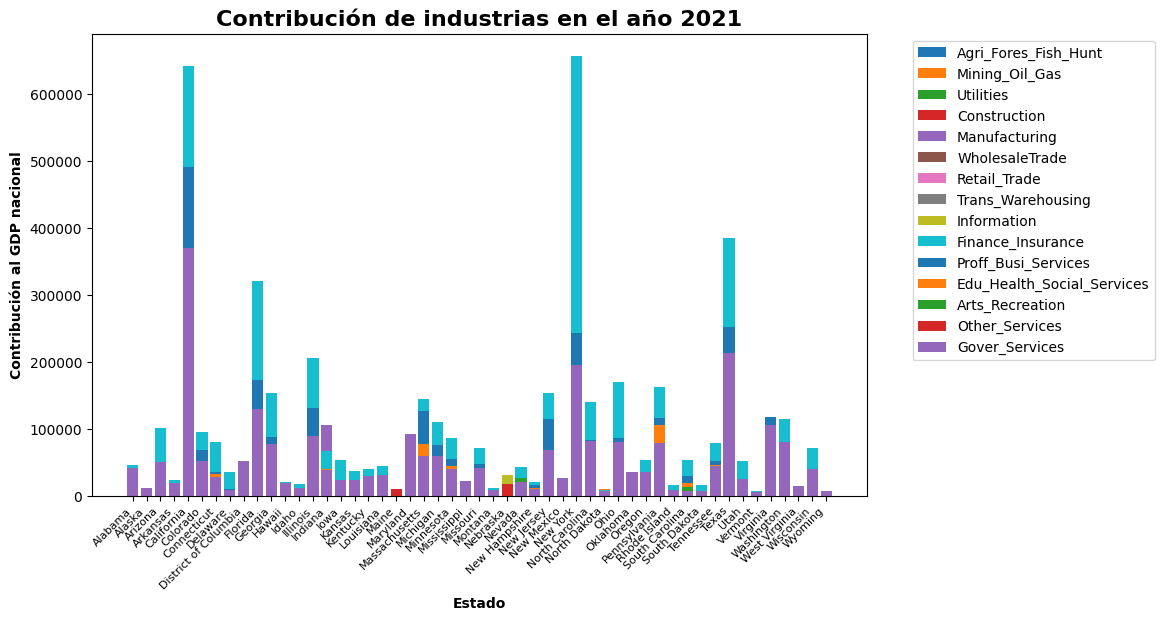

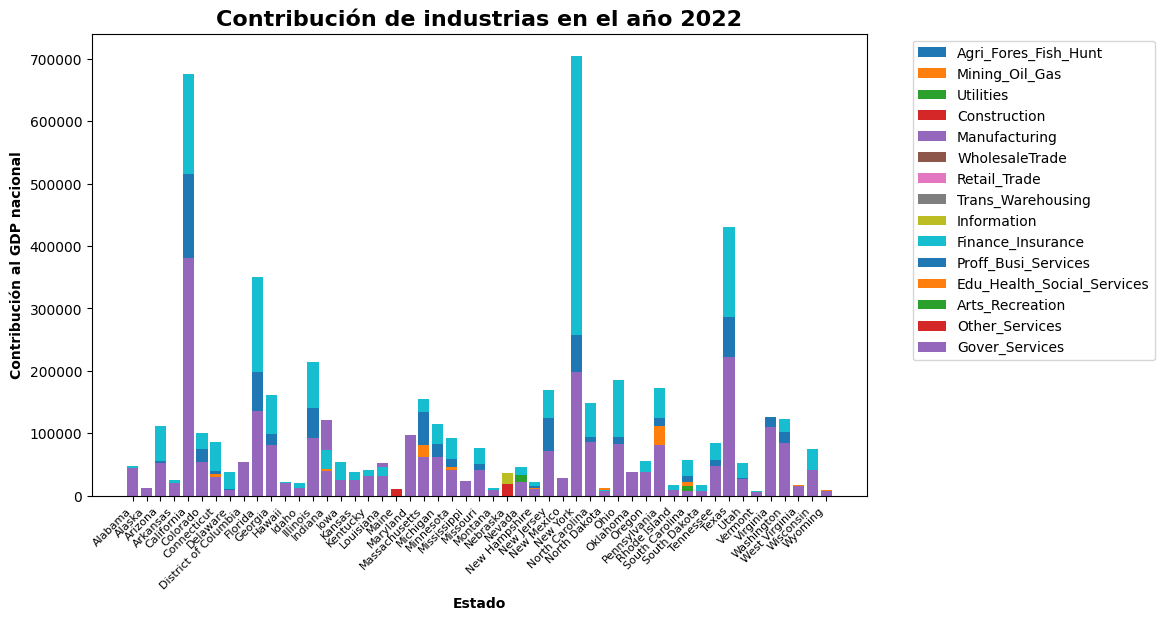

In [10]:
# Creamos gráficos para cada año
for year in years:
    # Filtramos los datos para el año actual
    year_data = df_gdp_state_wo_total[df_gdp_state_wo_total["Year"] == year]

    # Creamos una nueva figura de matplotlib
    plt.figure(figsize=(10, 6))

    # Iteramos sobre cada columna (industria) en los datos de las industrias
    for column in year_data.columns[2:]:
        # Graficamos los datos de la industria para cada estado
        plt.bar(year_data["State"], year_data[column], label=column)

    # Agregamos título al gráfico
    plt.title(
        f"Contribución de industrias en el año {year}", fontsize=16, weight="bold"
    )
    # Rotamos las etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45, ha="right", fontsize=8)
    # Agregamos etiqueta al eje x
    plt.xlabel("Estado", weight="bold")
    # Agregamos etiqueta al eje y
    plt.ylabel("Contribución al GDP nacional", weight="bold")
    # Agregamos leyenda al gráfico
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    # Mostramos el gráfico
    plt.show()

## 4. Aporte total al GDP de cada Industria a lo largo de los años


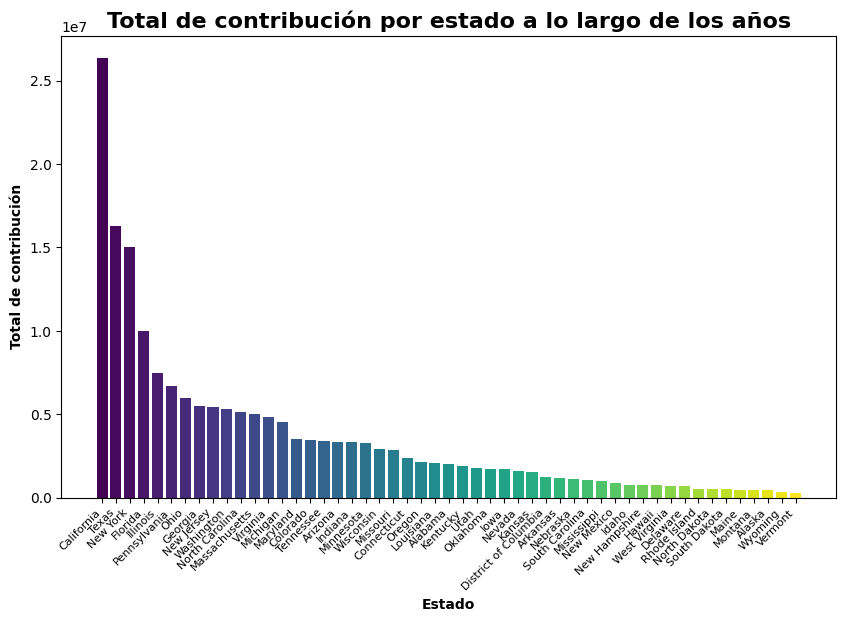

In [11]:
# Calculamos el total de cada estado a lo largo de los años
total_by_state = df_gdp_state.groupby("State").sum()

# Ordenamos los datos de forma descendente por el total de contribución
total_by_state = total_by_state.sum(axis=1).sort_values(ascending=False)

# Creamos una nueva figura de matplotlib
plt.figure(figsize=(10, 6))

# Obtenemos los colores para las barras
colors = plt.cm.viridis(np.linspace(0, 1, len(total_by_state)))

# Graficamos las barras de los totales por estado
plt.bar(total_by_state.index, total_by_state, color=colors)

# Agregamos título al gráfico
plt.title(
    "Total de contribución por estado a lo largo de los años",
    fontsize=16,
    weight="bold",
)
# Agregamos etiqueta al eje x
plt.xlabel("Estado", weight="bold")
# Rotamos las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha="right", fontsize=8)
# Agregamos etiqueta al eje y
plt.ylabel("Total de contribución", weight="bold")

# Mostramos el gráfico
plt.show()

In [16]:
# Ruta del archivo GeoJSON que contiene los límites de los estados de EE. UU.
state_geo = "../../data/Otras fuentes/usa-states.json"

# Creamos una lista de valores de GDP para definir los bins del mapa coroplético
bins = list(df_gdp_state["Total"].quantile([0, 0.5, 0.75, 0.90, 1]))

# Creamos un objeto de mapa de folium centrado en EE. UU.
map_gdp = folium.Map(location=[37, -102], zoom_start=4)

# Creamos un objeto de mapa coroplético (Choropleth)
choropleth_gdp = folium.Choropleth(
    geo_data=state_geo,  # Datos geoespaciales de los estados de EE. UU.
    name="choropleth",
    data=df_gdp_state,  # DataFrame que contiene los datos de GDP por estado
    columns=["State", "Total"],  # Columnas del DataFrame que se utilizarán para el mapa
    key_on="feature.properties.name",  # Clave para unir los datos del DataFrame con los datos geoespaciales
    fill_color="YlOrRd",  # Esquema de color para el relleno de los estados
    fill_opacity=0.7,  # Opacidad del relleno
    line_opacity=0.2,  # Opacidad de las líneas de límite entre estados
    legend_name="Total GDP",  # Título de la leyenda del mapa
    bins=bins,  # Bins para clasificar los datos
    reset=True,  # Restablecer el mapa
    highlight=True,  # Resaltar el polígono al pasar el mouse
    nan_fill_color="grey",  # Color para los valores NaN (no disponibles)
    nan_fill_opacity=0.4,  # Opacidad para los valores NaN
    tooltip=folium.features.GeoJsonTooltip(  # Agregar tooltip con valores de GDP
        fields=["name", "Total"],  # Campos a mostrar en el tooltip
        aliases=["State:", "GDP:"],  # Alias para los campos
        style=(
            "background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"
        ),
    ),
).add_to(map_gdp)

# Agregamos tooltips personalizados al mapa coroplético
style_function = "font-size: 15px; font-weight: bold"
choropleth_gdp.geojson.add_child(
    folium.features.GeoJsonTooltip(["name"], style=style_function, labels=False)
)

# Agregamos leyenda al mapa coroplético
map_gdp.add_child(folium.LayerControl())

# Mostramos el mapa coroplético
map_gdp